# PLANTILLA EDA

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

## IMPORTAR PAQUETES

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Nombres de los ficheros de datos.

In [18]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [19]:
cat = pd.read_pickle( '../../02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle( '../../02_Datos/03_Trabajo/' + nombre_num)
cat

,origen,fuente,no_enviar_email,no_llamar,ult_actividad,ambito,ocupacion,conociste_google,conociste_periodico,conociste_facebook,conociste_referencias,descarga_lm
id,,,,,,,,,,,,
660737,API,Chat,No,No,Page Visited on Website,Select,Unemployed,No,No,No,No,No
660727,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,No,No,No,No,Yes
660719,Landing Page Submission,Direct Traffic,No,No,OTROS,Media and Advertising,Unemployed,No,No,No,No,No
660681,Landing Page Submission,Google,No,No,Converted to Lead,Select,Unemployed,No,No,No,No,No
660680,API,Chat,No,No,Chat Conversation,Select,Unemployed,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
579642,Landing Page Submission,Direct Traffic,No,No,SMS Sent,Human Resource Management,Unemployed,No,No,No,No,Yes
579622,API,Direct Traffic,No,No,SMS Sent,Select,Unemployed,No,No,No,No,No
579615,Landing Page Submission,Direct Traffic,No,No,SMS Sent,Business Administration,Unemployed,No,No,No,No,No


## EDA CATEGÓRICAS

### Análisis estadístico

In [21]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [22]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
25,ambito,Healthcare Management,0.021261
28,ambito,International Business,0.023330
30,ambito,Media and Advertising,0.025588
35,ambito,Travel and Tourism,0.025588
34,ambito,Supply Chain Management,0.044779
22,ambito,"Banking, Investment And Insurance",0.045532
27,ambito,IT Projects Management,0.048918
23,ambito,Business Administration,0.052681
32,ambito,Operations Management,0.063594
31,ambito,OTROS,0.068109


In [23]:
cat=cat.loc[(cat.ult_actividad!= 'Email Bounced') & (cat.no_enviar_email!= 'Yes') & (cat.no_llamar!= 'OTROS')] \
.drop(columns=['no_enviar_email','no_llamar','conociste_google','conociste_periodico','conociste_facebook','conociste_referencias'])

cat

,origen,fuente,ult_actividad,ambito,ocupacion,descarga_lm
id,,,,,,
660737,API,Chat,Page Visited on Website,Select,Unemployed,No
660727,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes
660719,Landing Page Submission,Direct Traffic,OTROS,Media and Advertising,Unemployed,No
660681,Landing Page Submission,Google,Converted to Lead,Select,Unemployed,No
660680,API,Chat,Chat Conversation,Select,Unemployed,No
...,...,...,...,...,...,...
579697,Landing Page Submission,Google,Email Opened,"Banking, Investment And Insurance",Unemployed,No
579642,Landing Page Submission,Direct Traffic,SMS Sent,Human Resource Management,Unemployed,Yes
579622,API,Direct Traffic,SMS Sent,Select,Unemployed,No


In [24]:
num=num[num.index.isin(cat.index)]
num

,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,score_actividad,score_perfil
id,,,,,,
660737,0,0,0,0.0,15.0,15.0
660727,1,2,1532,2.0,14.0,20.0
660719,0,1,305,1.0,13.0,17.0
660681,1,2,1428,1.0,15.0,18.0
660680,0,0,0,0.0,17.0,15.0
...,...,...,...,...,...,...
579697,1,8,1016,4.0,15.0,20.0
579642,0,2,1770,2.0,14.0,20.0
579622,1,13,1409,2.6,14.0,16.0


### Análisis gráfico

In [26]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
    plt.show()

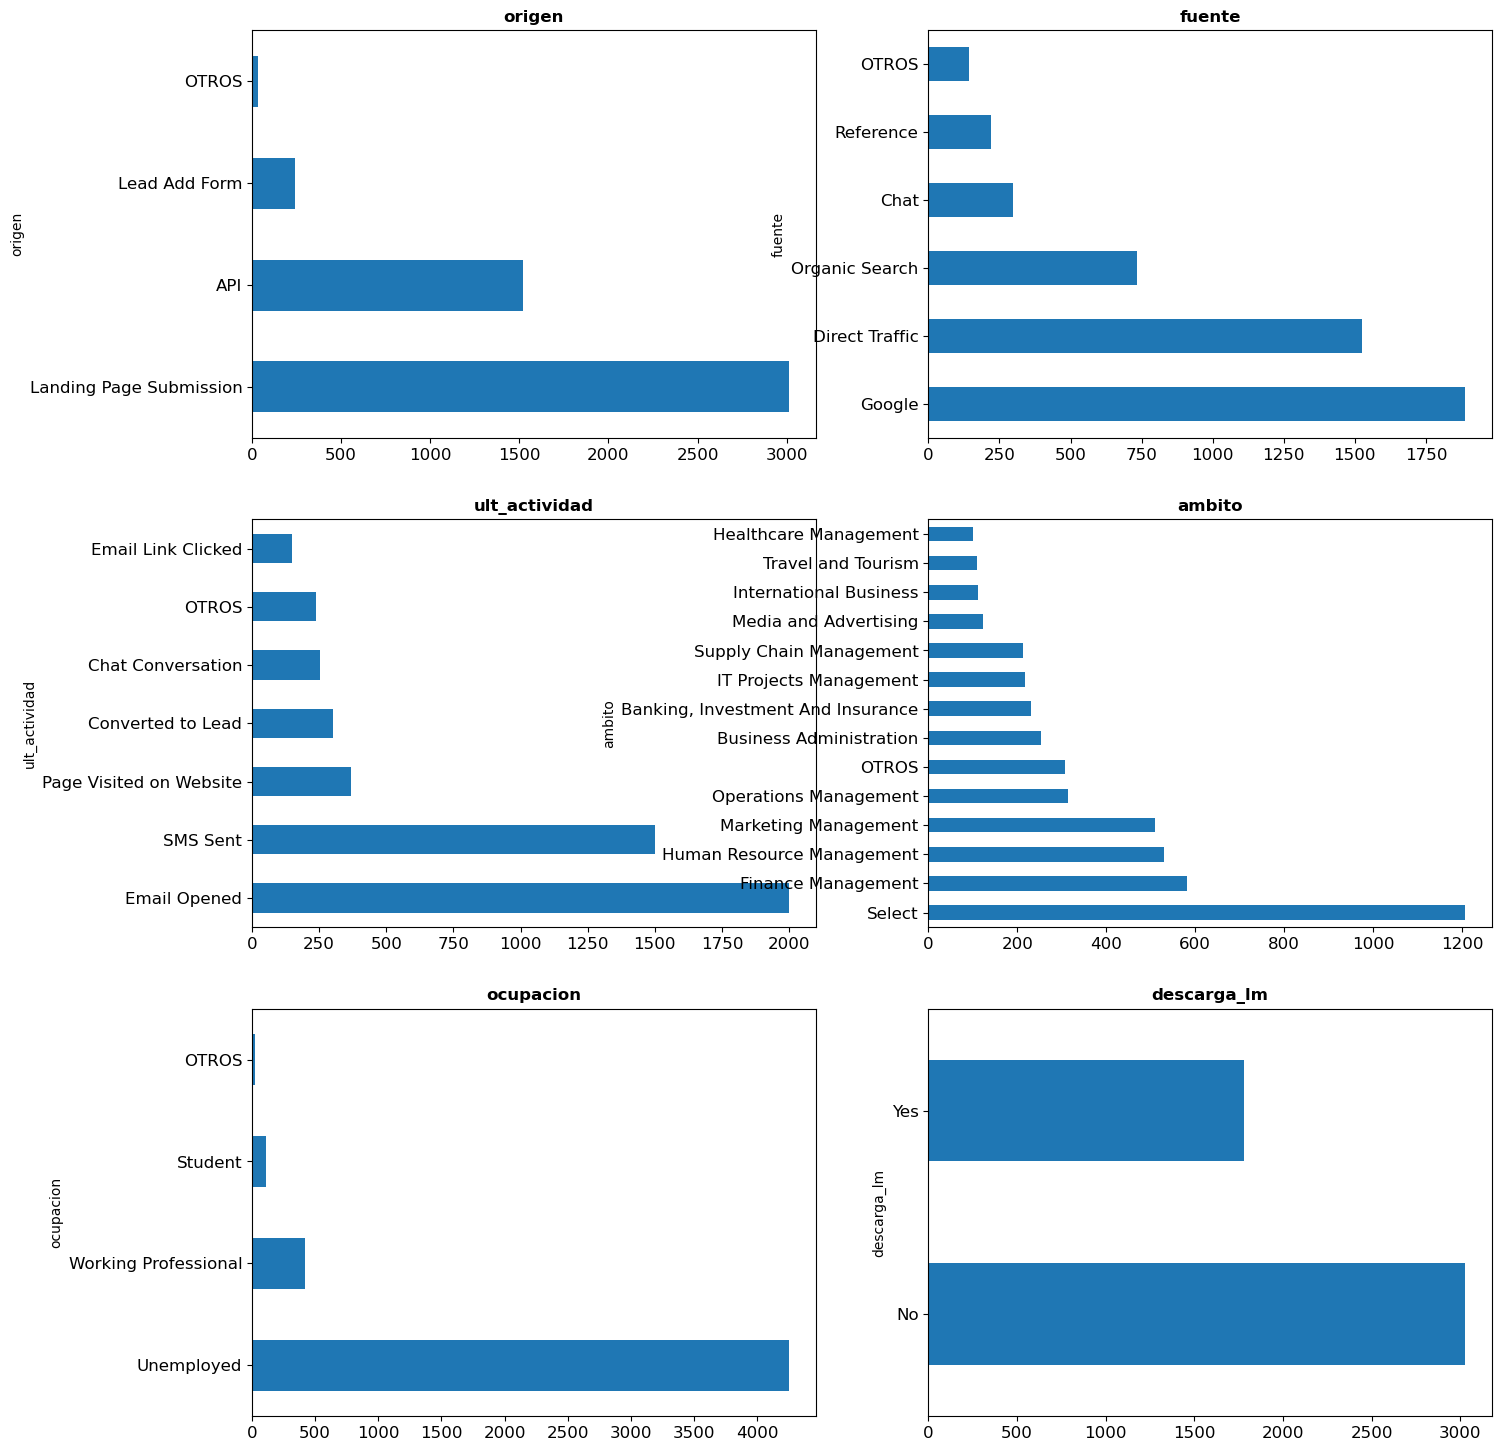

In [27]:
graficos_eda_categoricos(cat);

## EDA NUMÉRICAS

### Análisis estadístico

In [28]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [29]:
estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,4806.0,0.422181,0.0,0.493958,0.0,0.0,0.0,1.0,1.0
visitas_total,4806.0,4.137328,3.0,3.514245,0.0,2.0,3.0,5.0,50.0
tiempo_en_site_total,4806.0,605.795464,371.0,552.256707,0.0,138.0,371.0,1079.0,2272.0
paginas_vistas_visita,4806.0,2.872503,2.5,1.907815,0.0,2.0,2.5,4.0,16.0
score_actividad,4806.0,14.063878,14.0,0.934191,9.0,14.0,14.0,14.0,18.0
score_perfil,4806.0,16.301706,16.0,1.453298,11.0,16.0,16.0,17.0,20.0


### Análisis gráfico

In [30]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)
    plt.show()

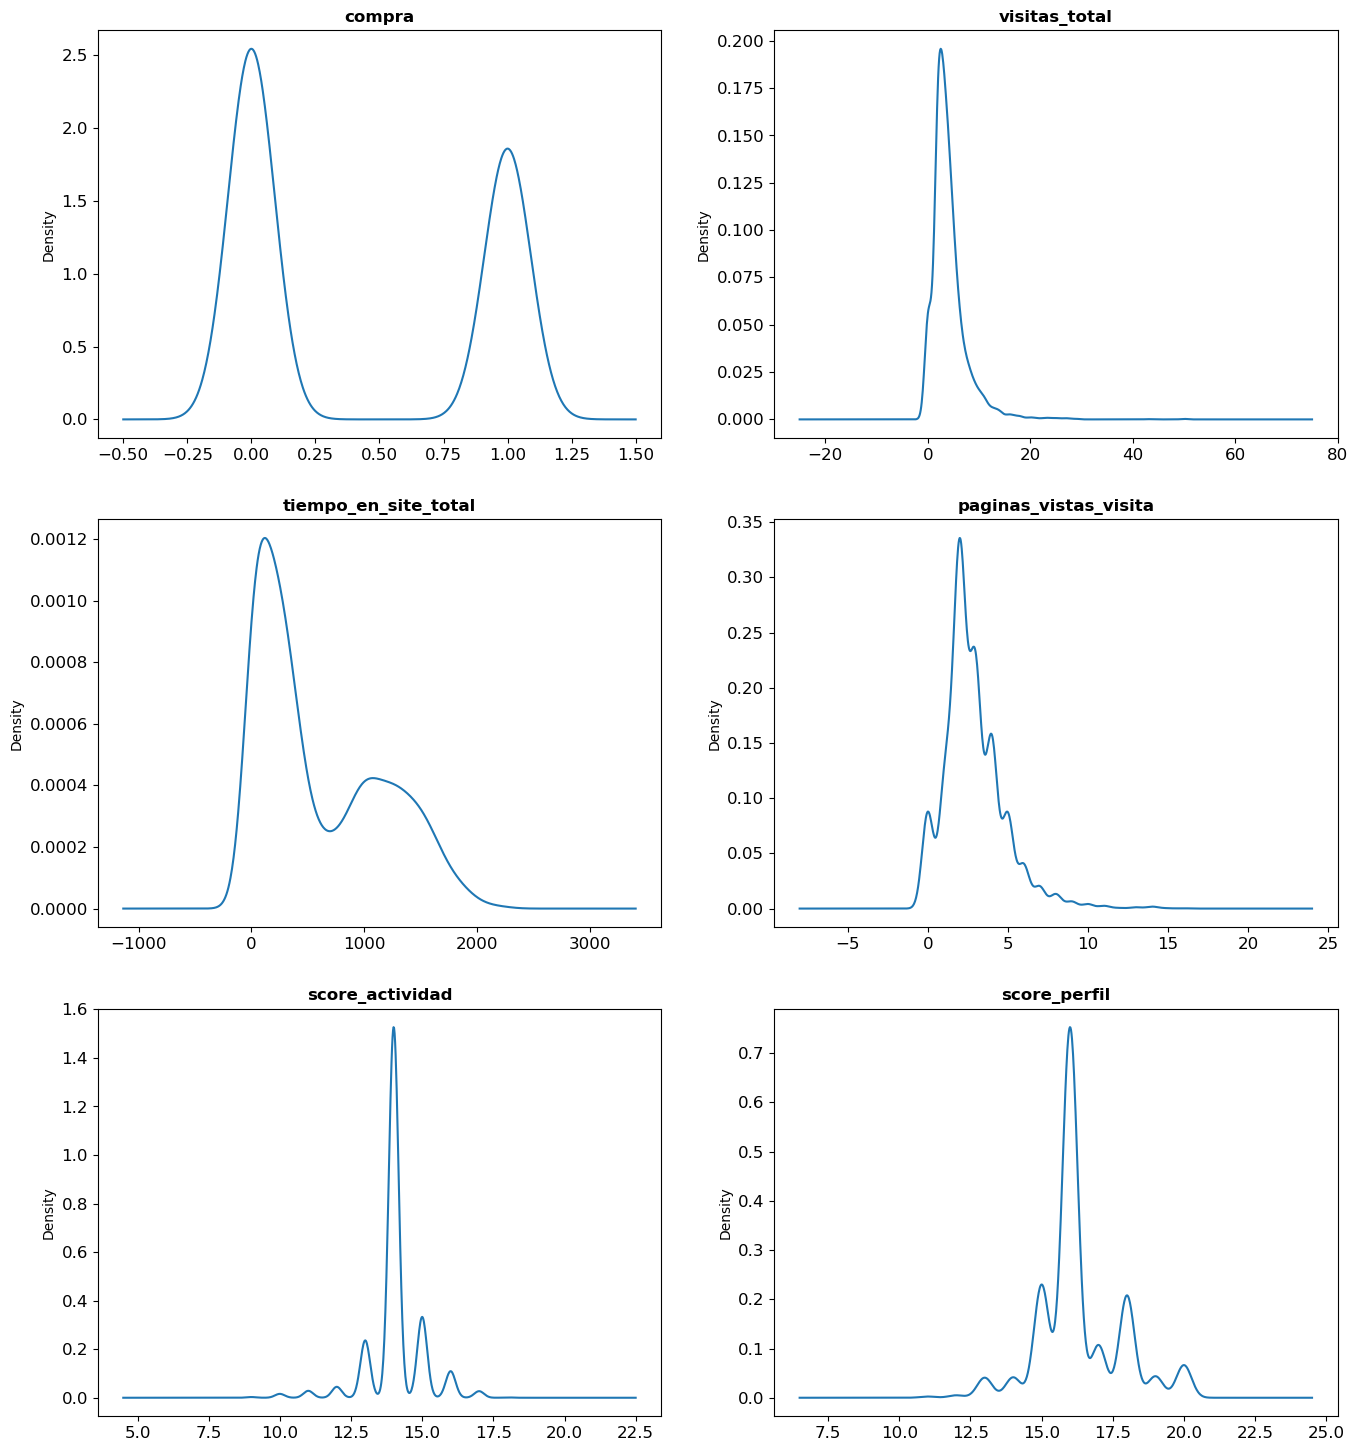

In [31]:
graficos_eda_continuas(num)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [32]:
cat.reset_index(inplace=True)
num.reset_index(inplace=True)

In [35]:
#Definir los nombres de los archivos
ruta_cat =  '../../02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num =  '../../02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [36]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)